In [1]:
%load_ext autoreload
%autoreload 2
import warnings
warnings.filterwarnings('ignore')

In [2]:
import sys
sys.path.append('../')
import dataset_wrapper as util

In [6]:
import ee
ee.Authenticate() 
ee.Initialize()

In [12]:
import geopandas as gpd
dataframe = gpd.read_file('/data2/hkaman/Data/CDL/California_Counties.geojson')
# dataframe = dataframe.to_crs(epsg=4326)
# dataframe

In [ ]:
import calendar
for year in range(2008, 2023):
    if year != 2012:
        for index in range(12):
            year = year
            month = index + 1
            last_day = calendar.monthrange(year, month)[1]
            start_date = f'{year}-{month:02d}-01'
            end_date = f'{year}-{month:02d}-{last_day}'

            DD = util.DownloadSatelliteImgEE(year = year,  
                                        county_name= 'Yolo',
                                        start_date = start_date,   
                                        end_date= end_date,              
                                        cloud_filter= 5, 
                                        satellite = 'Landsat')

            images  = DD.__call__()

### visualization

image name: SanJoaquin_LT_2008_12.tif


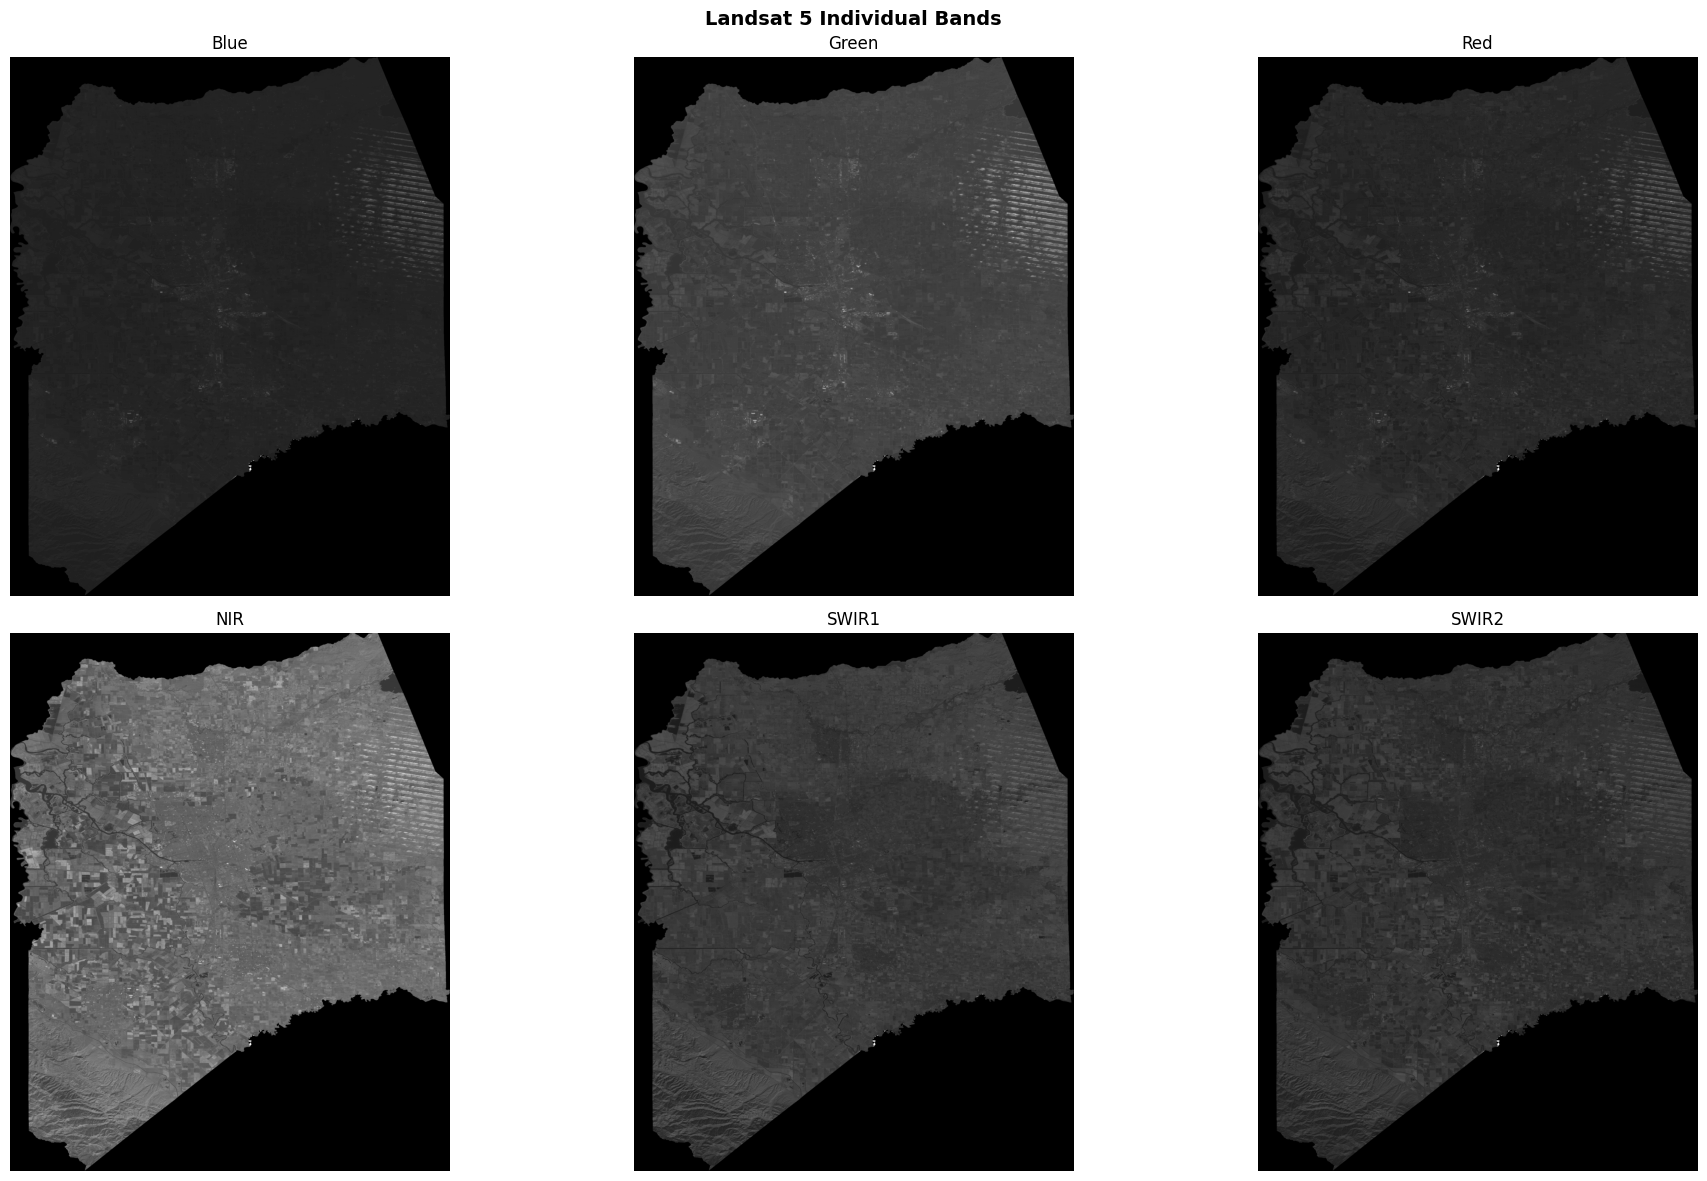

In [14]:
folder_path = f'/data2/hkaman/Data/YieldBenchmark/counties/SanJoaquin/Raw/Landsat/{2008}/' 
util.plot_landsat5_all_bands_by_index(folder_path, 11)

Original shape: (35180, 38410)
Original CRS: EPSG:4326


<Figure size 1000x1000 with 0 Axes>

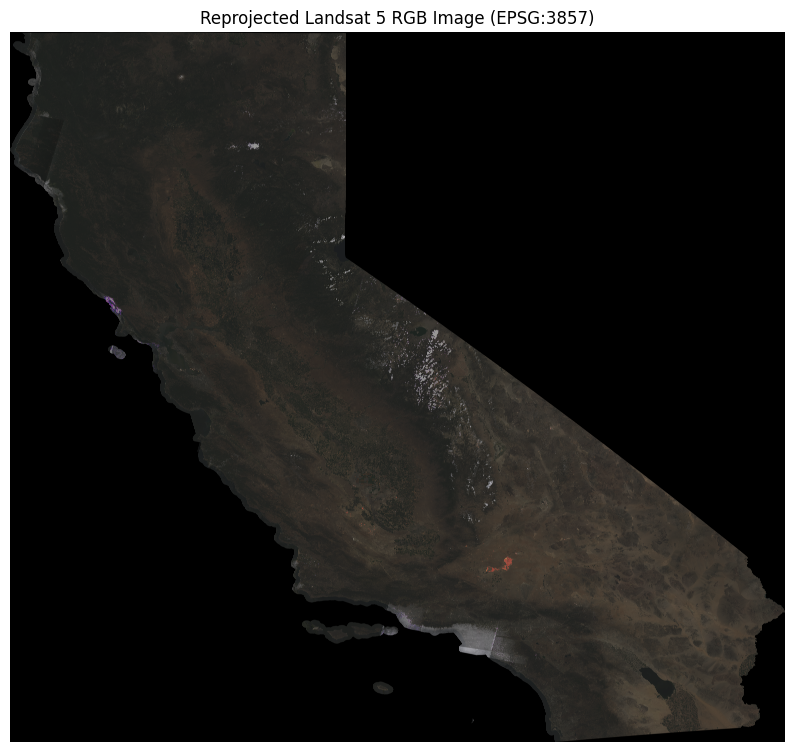

In [4]:
util.plot_landsat5_rgb('/data2/hkaman/Data/FoundationModel/Full/merged_landsat.tif')

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


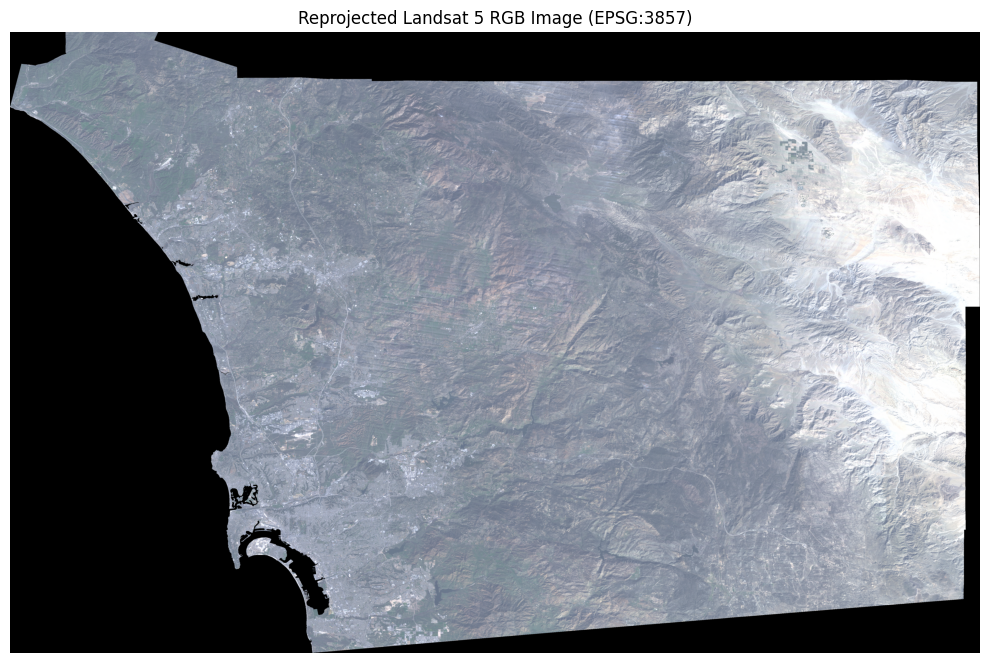

In [3]:
util.plot_landsat5_rgb('/data2/hkaman/Data/FoundationModel/Inputs/SanDiego/Raw/Landsat/2008/SanDiego_2008_02_01.tif')

### Data availability

In [ ]:
util.rename_folders_and_files("/data2/hkaman/Data/FoundationModel/Inputs")

In [8]:
import os
county_names = sorted(list(os.listdir('/data2/hkaman/Data/YieldBenchmark/counties')))

In [ ]:
# for county_name in county_names[2:]:
parent_path = f'/data2/hkaman/Data/FoundationModel/Inputs/{county_names[27]}/Raw/Landsat'    
util.detect_tif_size_outliers(parent_path, tolerance_mb=10)

In [11]:
county_names = ['ContraCosta', 'SanJoaquin']
for county_name in county_names:
    parent_path = f'/data2/hkaman/Data/YieldBenchmark/counties/{county_name}/Raw/Landsat'
    count_df = util.count_observations_by_month(parent_path, county_name= county_name)

CSV file saved at: /data2/hkaman/Data/YieldBenchmark/counties/ContraCosta/Raw/Landsat/ContraCosta_opm.csv
CSV file saved at: /data2/hkaman/Data/YieldBenchmark/counties/SanJoaquin/Raw/Landsat/SanJoaquin_opm.csv
